<a href="https://colab.research.google.com/github/lameesalsheikh/Data-Science-using-Python/blob/main/healthcare_data_Science_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import basic libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#upload your data
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
#no duplicated values
#the null values in Bmi will calculate it later by(mean) no outlaiers depending on the mean average in describtion
# skewed data in age	hypertension	heart_disease	avg_glucose_level (on average skewed not too much)
#we can drop id no need for it


In [9]:
#split dataset to categorical and numarical
df_numerical_features = df.select_dtypes(include='number')
df_numerical_features.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

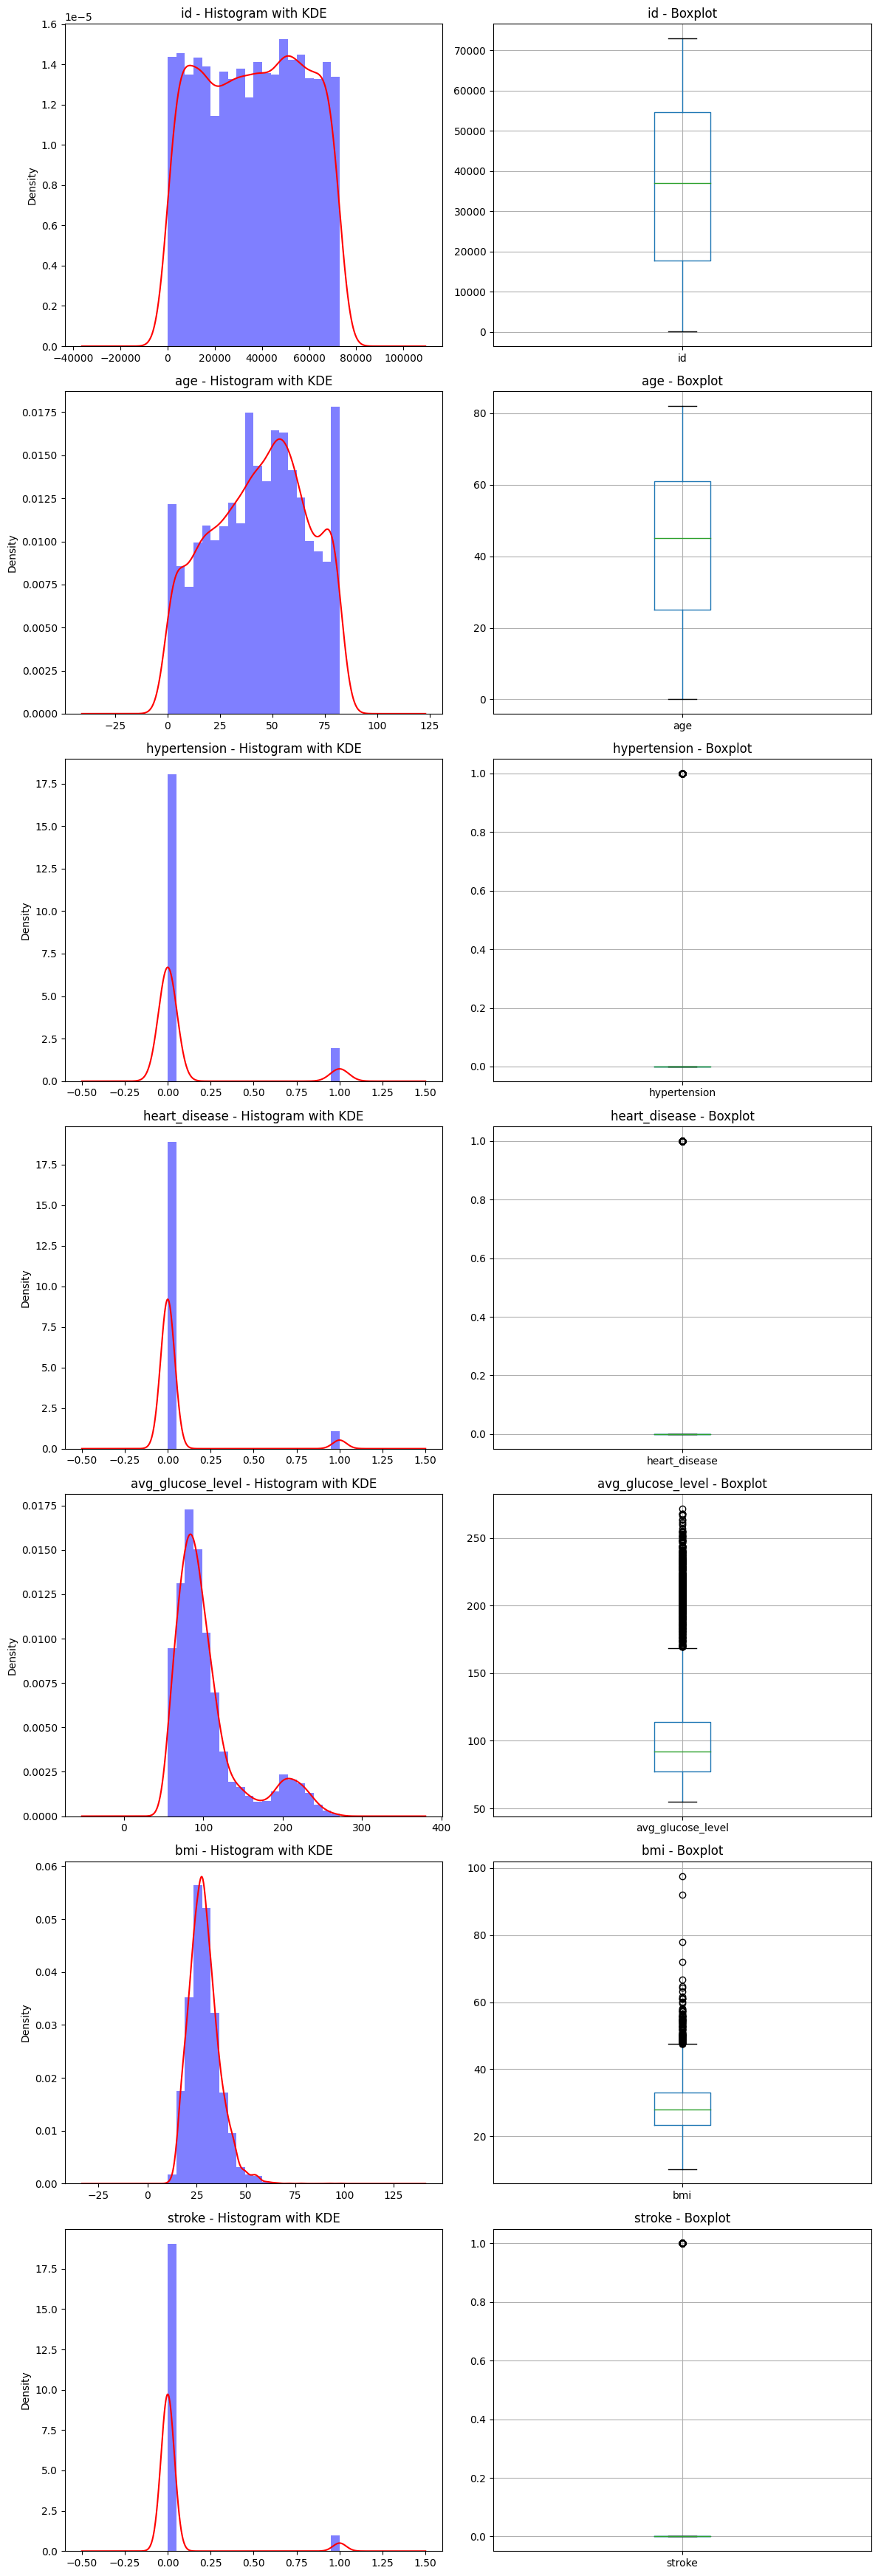

In [10]:
# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_numerical_features.columns), 2, figsize=(12, 5 * len(df_numerical_features.columns)))

for i, col in enumerate(df_numerical_features.columns):
    # Histogram with KDE
    df_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    df_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

In [11]:
#heart rate and hyper and stroke is categorical values
#out laiers in bmi and avg_glucose


In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
df_cat = df[['gender', 'hypertension', 'heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']]
df_cat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,0
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,Male,0,0,Yes,Private,Rural,formerly smoked,0


In [14]:
for i in df_cat.columns:
  print(i)
  print("The value are")
  print(df_cat[i].value_counts())

gender
The value are
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
hypertension
The value are
0    4612
1     498
Name: hypertension, dtype: int64
heart_disease
The value are
0    4834
1     276
Name: heart_disease, dtype: int64
ever_married
The value are
Yes    3353
No     1757
Name: ever_married, dtype: int64
work_type
The value are
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Residence_type
The value are
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
smoking_status
The value are
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
stroke
The value are
0    4861
1     249
Name: stroke, dtype: int64


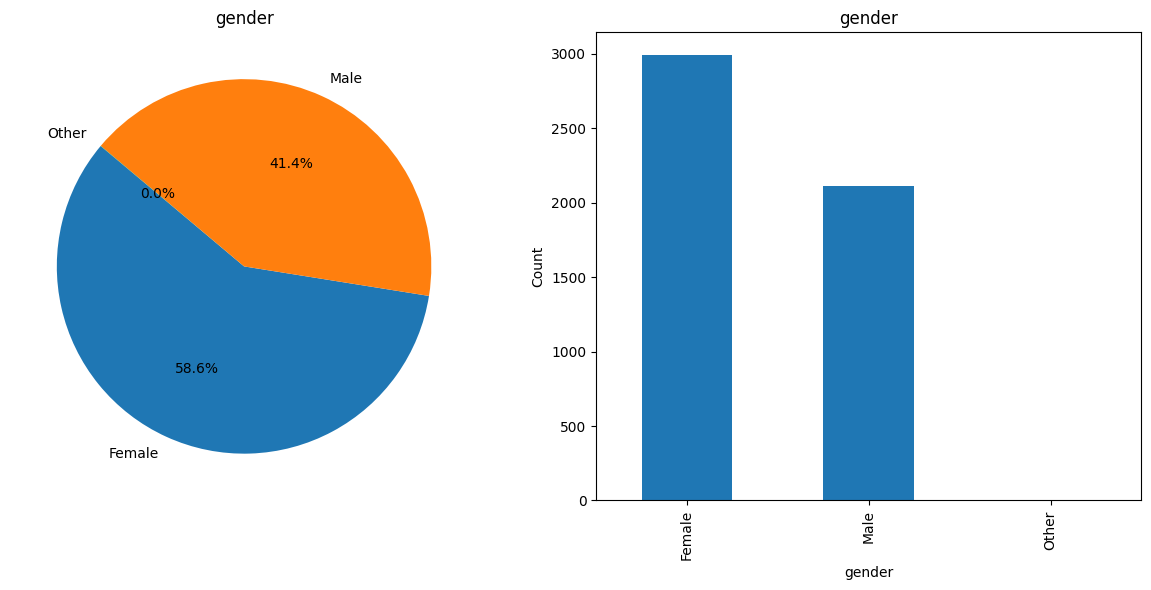

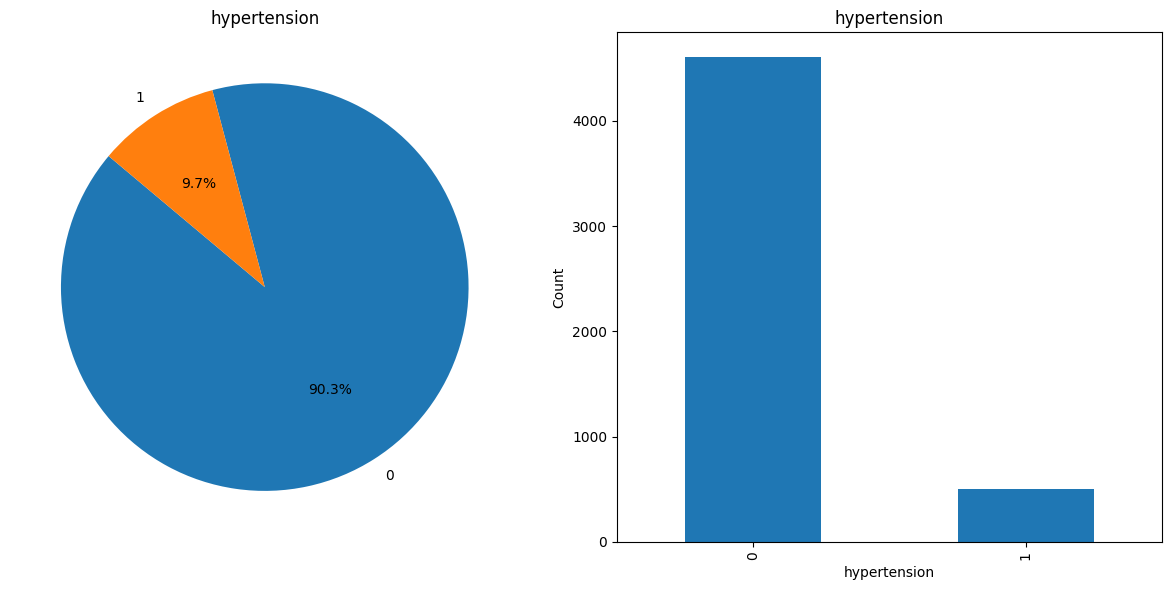

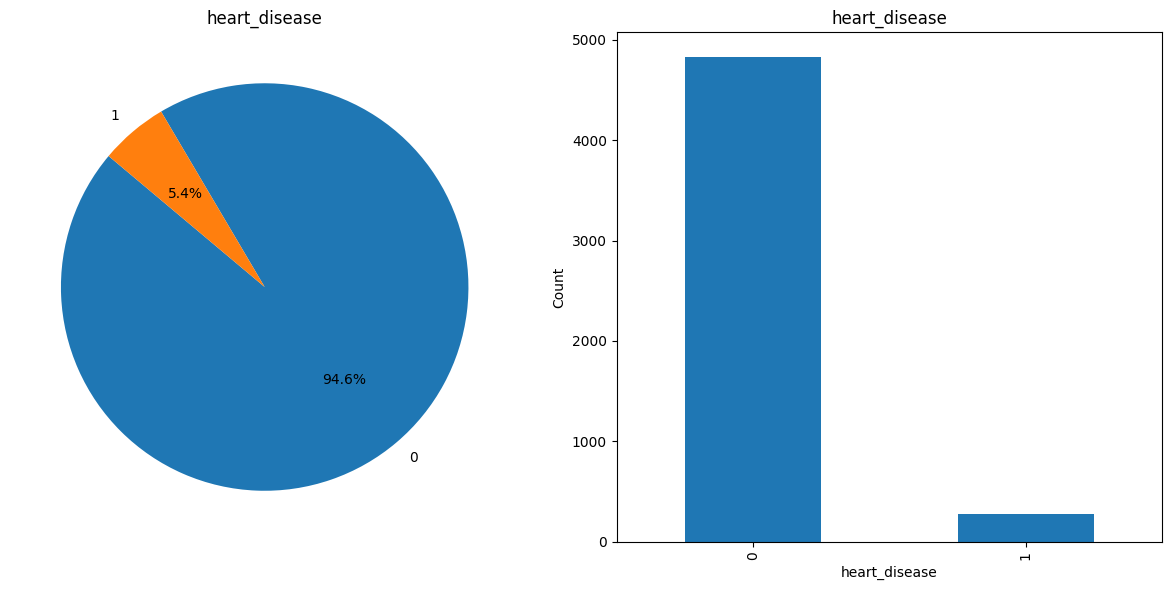

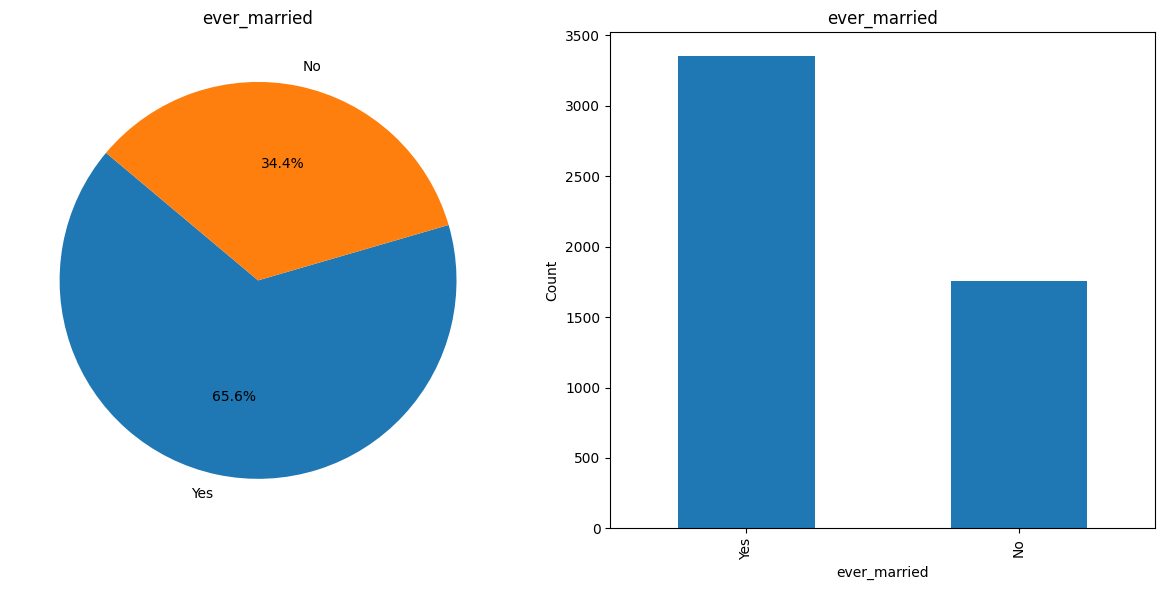

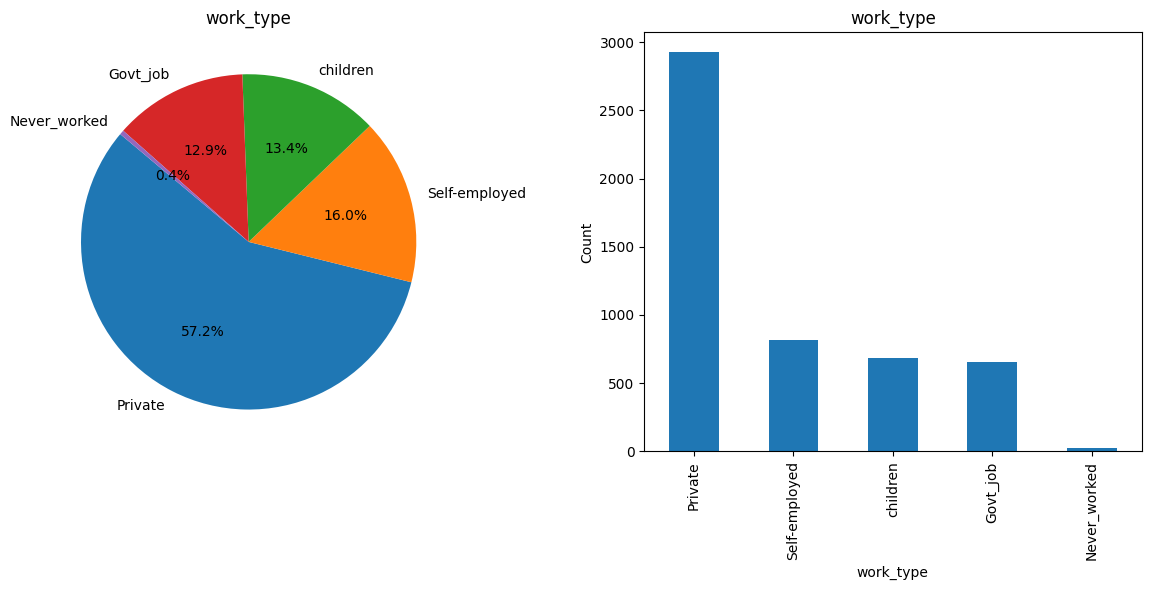

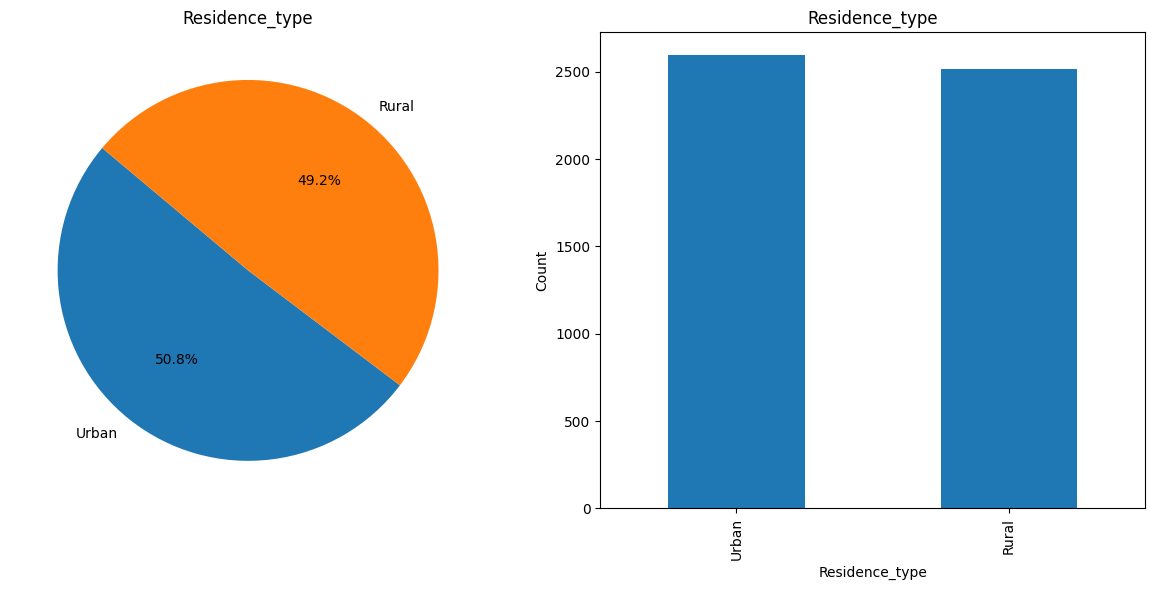

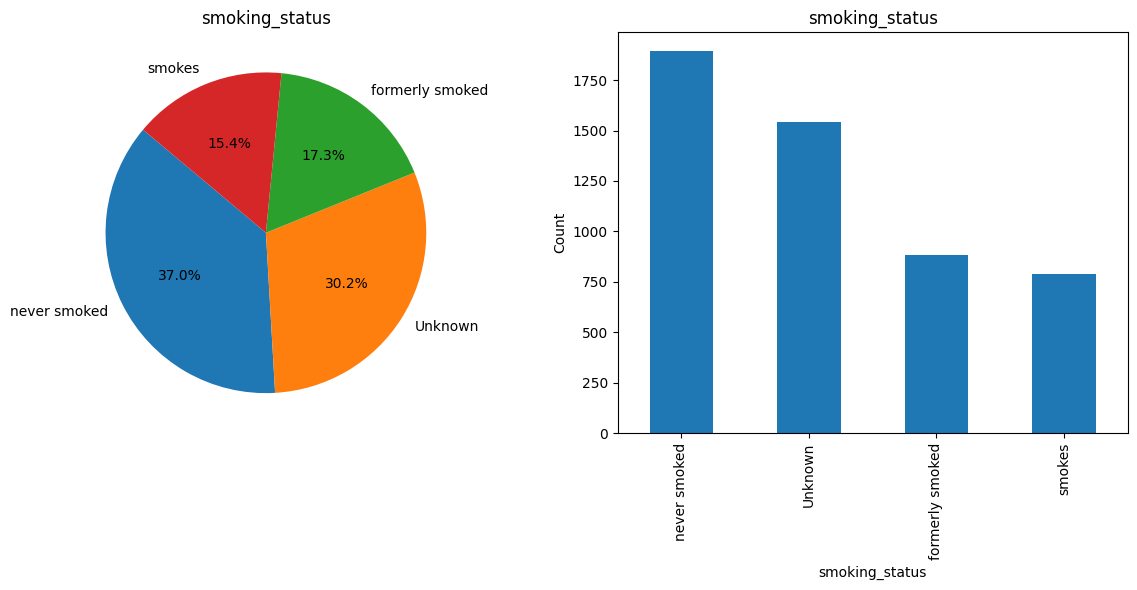

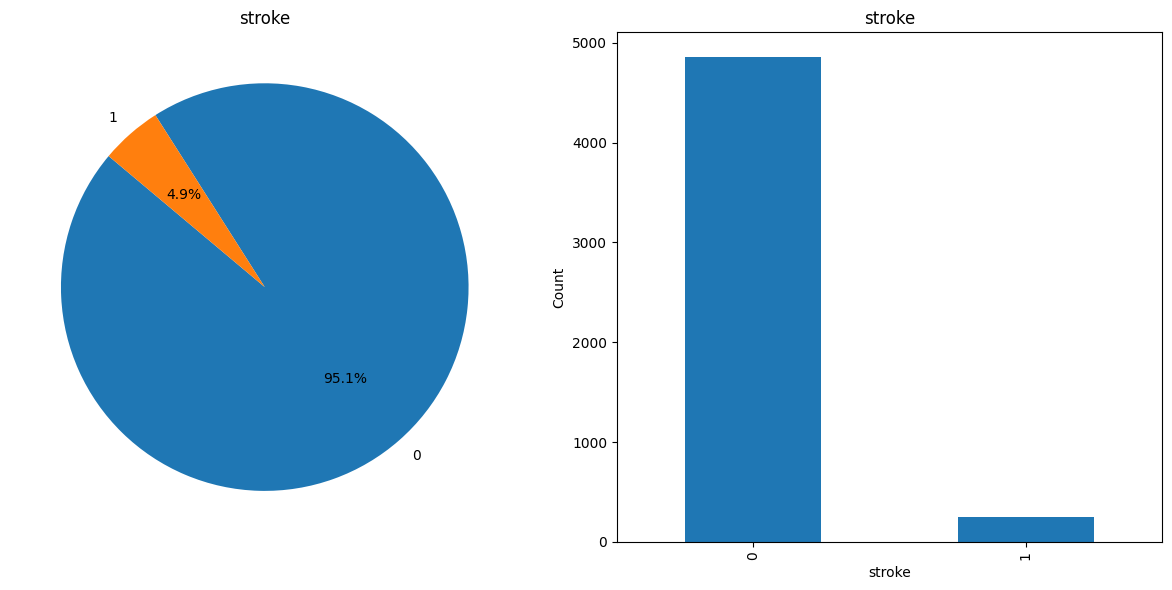

In [15]:
for i in df_cat.columns:
  counts = df_cat[i].value_counts()

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Pie chart
  axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  axes[0].set_title(i)

  # Bar chart
  counts.plot(kind='bar', ax=axes[1])
  axes[1].set_title(i)
  axes[1].set_ylabel('Count')
  axes[1].set_xlabel(i)

  plt.tight_layout()
  plt.show()

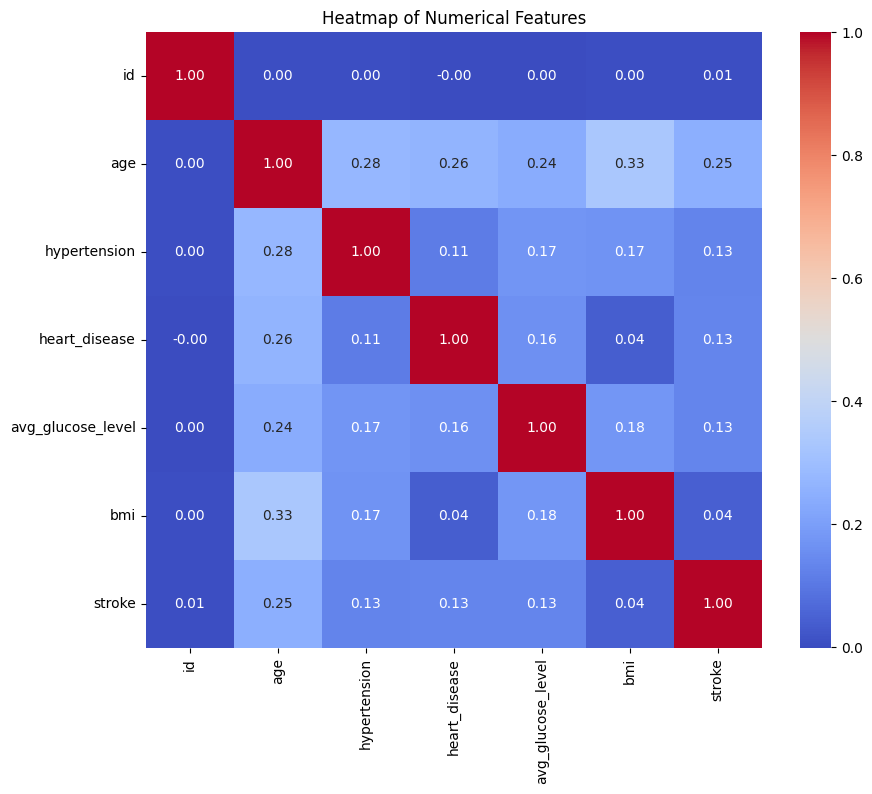

In [16]:
#heatmap
corr = df_numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

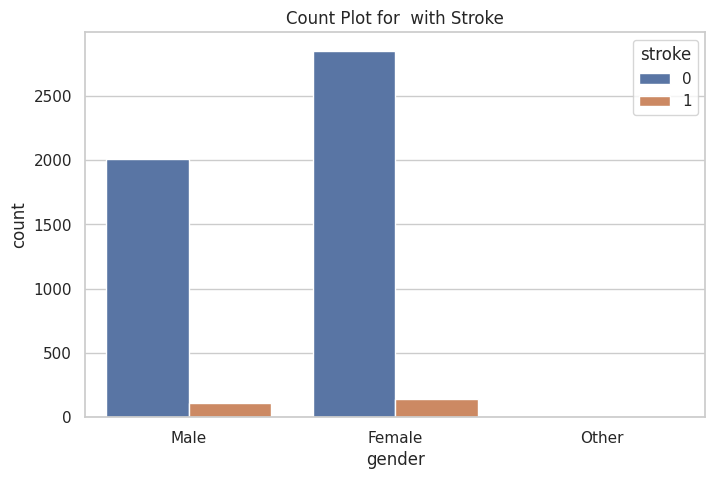

In [37]:

# Set the style for the plot
sns.set(style="whitegrid")

# Create a count plot for 'gender' with 'stroke' as hue
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Count Plot for  with Stroke')
plt.show()


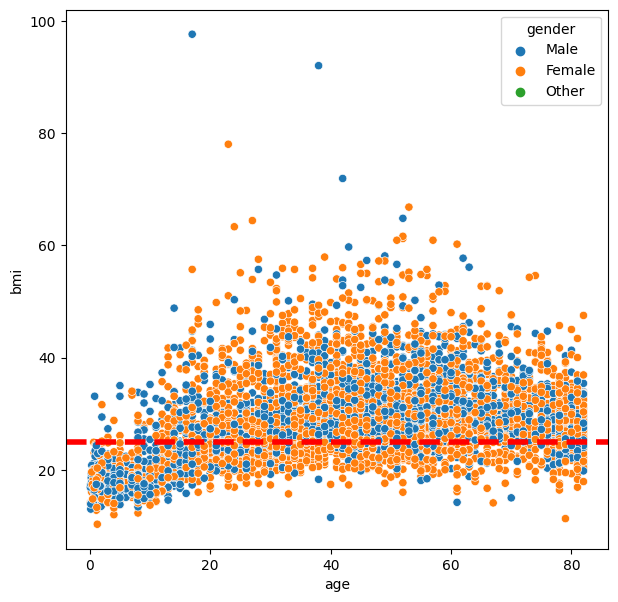

In [19]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

In [20]:
#the result we want is (0,1) so it is categorical and supervised
#drop uneed feiled like Id
#split data
#fill na data
#encode data
#try all models with confusion matrix
#evaluate models and choose one
#apply the model and train data


In [43]:
df.drop(['id'],axis=1,inplace=True)


KeyError: ignored

In [42]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [47]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [44]:
#data preporcessing
# Handle missing values
df = df.dropna()

In [56]:
#encoding gender	ever_married	work_type	Residence_type	smoking_status
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the resulting DataFrame
print(df_encoded.head())

    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   
5  81.0             0              0             186.21  29.0       1   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0              0            1             0                0  ...   
2              0            1             0                0  ...   
3              1            0             0                0  ...   
4              1            0             0                0  ...   
5              0            1             0                0  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   


In [60]:
# Define features (X) and target variable (y)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

In [61]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
df_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Train Support Vector Classifier (SVC) model
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

# Train k-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)
svc_pred = svc_model.predict(X_test_scaled)
knn_pred = knn_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)
nb_pred = nb_model.predict(X_test_scaled)

# Evaluate models
models = [('Logistic Regression', lr_pred), ('SVC', svc_pred), ('KNN', knn_pred), ('Decision Tree', dt_pred), ('Naive Bayes', nb_pred)]

for model_name, y_pred in models:
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_mat}")
    print(f"Classification Report:\n{classification_rep}")
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.9460285132382892
Confusion Matrix:
[[929   0]
 [ 53   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982

--------------------------------------------------
Model: SVC
Accuracy: 0.9460285132382892
Confusion Matrix:
[[929   0]
 [ 53   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982

--------------------------------------------------
Model: KNN
Accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

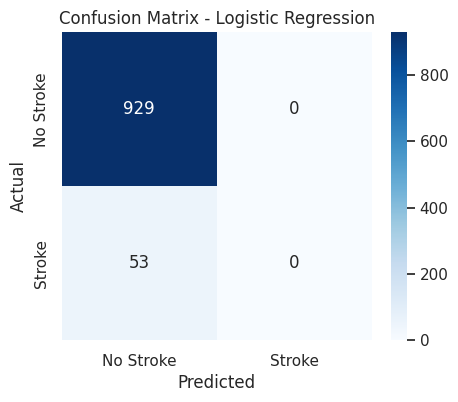

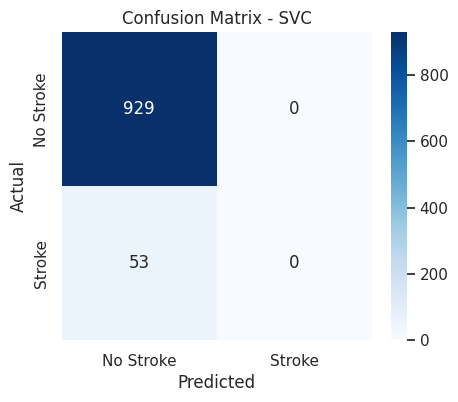

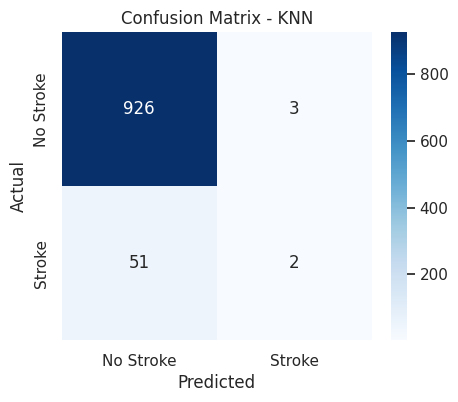

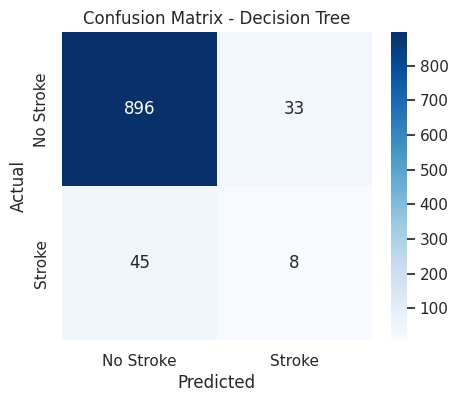

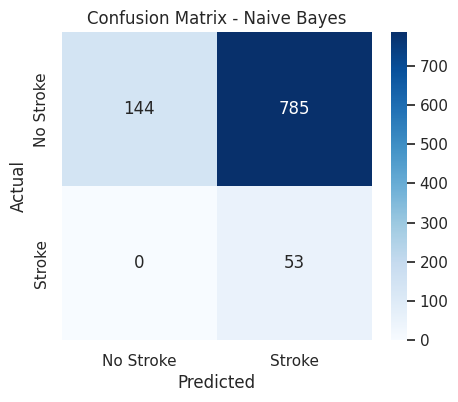

In [65]:


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Assuming 'y_test' is the true labels for the test set

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, 'Logistic Regression')

# Plot confusion matrix for Support Vector Classifier (SVC)
plot_confusion_matrix(y_test, svc_pred, 'SVC')

# Plot confusion matrix for k-Nearest Neighbors (KNN)
plot_confusion_matrix(y_test, knn_pred, 'KNN')

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree')

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(y_test, nb_pred, 'Naive Bayes')


In [71]:
#i will apply KNN because it is the suitable for our case
# Train k-Nearest Neighbors (KNN) model on the entire dataset
# Train k-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the entire dataset
knn_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_pred)
classification_rep = classification_report(y_test, knn_pred)
confusion_mat = confusion_matrix(y_test, knn_pred)

print("Model: k-Nearest Neighbors (KNN) - Applied on the Entire Dataset")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Model: k-Nearest Neighbors (KNN) - Applied on the Entire Dataset
Accuracy: 0.945010183299389
Confusion Matrix:
[[926   3]
 [ 51   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.40      0.04      0.07        53

    accuracy                           0.95       982
   macro avg       0.67      0.52      0.52       982
weighted avg       0.92      0.95      0.92       982



In [72]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [73]:
#encoding gender	ever_married	work_type	Residence_type	smoking_status
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns)

# Display the resulting DataFrame
print(df.head())

    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   
5  81.0             0              0             186.21  29.0       1   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0              0            1             0                0  ...   
2              0            1             0                0  ...   
3              1            0             0                0  ...   
4              1            0             0                0  ...   
5              0            1             0                0  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   


In [74]:
df = df.dropna()

In [76]:
# Define features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_scaled = scaler.transform(X)


In [78]:
# Train k-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)

KNeighborsClassifier()

In [82]:
from sklearn.pipeline import Pipeline

import joblib

# Create a pipeline with StandardScaler and KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Fit the pipeline on the entire dataset
knn_pipeline.fit(X, y)

# Save the KNN model to a .pkl file
joblib.dump(knn_pipeline, 'knn_model.pkl')


['knn_model.pkl']

In [83]:

# Load the KNN model from the .pkl file
loaded_knn_model = joblib.load('knn_model.pkl')

# Example: Make predictions using the loaded model
example_data = X.head(1)  # Replace with your actual data
predictions = loaded_knn_model.predict(example_data)

print("Example Predictions:", predictions)


Example Predictions: [0]
